# Pembuatan Basic dalam Linear Regression

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


### Data X dan Y

In [2]:
panjang_data = 100

data_y = np.array([i * 0.1+ np.random.randn() for i in range(panjang_data)])
data_x = np.array([i*0.1 for i in range(panjang_data)])

print(data_x)
print(data_y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[ 1.8245545  -0.21348023  1.41172777  0.90877804  0.04137273  0.12362124
  1.96271539  1.49731034  0.69451941  0.06398608  3.25814186  2.17620703
  2.71891465 -0.50677703  2.36729029  0.71871094  1.56771205  0.13931799
  0.71600202  2.48751864  1.04590591  3.02630432  1.63261478  3.56164917
  2.45627584  1.7598034   0.89384078  2.86517831  2.9027234   2.20372259
  2.73178092  3.47656919  2.57724291  4.27487344  1.74680503  3.84248164
  5.2263242   4.21183494  5.81488862  2.78987925  5.87273157  4.98508048
  5.79564259  5.51154293  2.23095818  3.7758733   4.69604317  4.490057
  6.6361734

### fungsi linear regresi

In [3]:
def linear_regresi(x, gradien):
    y = gradien*x       
    return y

#### melakukan perhitungan linear awal

In [4]:
x_prediksi = np.array([0, 10])
m_awal_prediksi = 5
y_prediksi = linear_regresi(x_prediksi, m_awal_prediksi)

#### menampilkan data awal

In [5]:
# # scatter itu adalah mengatur / menambahkan data berupa titik
# plt.scatter(data_x, data_y, color="green")
# plt.plot(x_prediksi, y_prediksi, color="red")

# # minX, maxX, minY, maxY
# plt.axis([0,10,0,10])
# plt.show()

In [6]:
m_prediksi = m_awal_prediksi
m_list_prediksi = []
x_list_prediksi = []
y_list_prediksi = []

# digunakan agar perpindahan prediksi jauh lebih halus dan akurat
learning_rate = 0.1

for i in range(1, panjang_data):
    y_prediksi = linear_regresi(data_x[i], m_prediksi)
    y_aslinya = data_y[i]

    error = y_aslinya - y_prediksi
    delta_m = learning_rate * error / data_x[i]
    m_prediksi = m_prediksi + delta_m

    m_list_prediksi.append(m_prediksi)
    y_list_prediksi.append(linear_regresi(np.array([0,10]), m_prediksi))
    x_list_prediksi.append(np.array([0,10]))


# plt.scatter(data_x, data_y, color="green")
# plt.plot(x_prediksi, [0, y_list_prediksi[-1]], color="red")
# print(x_list_prediksi[-1], y_list_prediksi[0])
# plt.axis([0,10,0,10])

# plt.show()

### visualisasi animasi prediksi

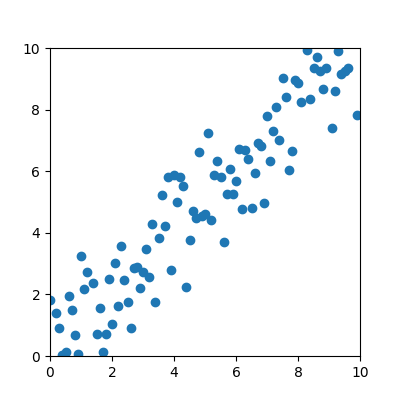

In [7]:
fig = plt.figure("Regresi Linear", figsize=(4, 4))
line, = plt.plot([], [], color="red")

def animate(frame_num):
    x = x_list_prediksi[frame_num]
    y = y_list_prediksi[frame_num]
    line.set_data((x, y))
    return line

plt.scatter(data_x, data_y)
plt.axis([0,10,0,10])

anime = FuncAnimation( fig, animate, frames=100, interval=100, repeat=False )
plt.show()

In [9]:
# Fungsi untuk menghitung MSE
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred)**2)

# np.delete

# Menghitung MSE
mse = mean_squared_error(data_y, y_list_prediksi)

# Menghitung R-squared
ssr = np.sum((y_list_prediksi - np.mean(data_y))**2)
sst = np.sum((data_y - np.mean(data_y))**2)
r_squared = ssr / sst

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)


ValueError: operands could not be broadcast together with shapes (100,) (99,2) 